In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from src.database.PostgresConnection import PostgresConnection

In [71]:
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_colwidth', None)

In [72]:
postgres_connection = PostgresConnection()
engine = postgres_connection.get_engine()

In [73]:
def get_df_from_sql(engine=engine,query = None):
    return pd.read_sql(query,engine)

In [74]:
df = pd.read_sql('SELECT * FROM public.all_good_books_info',con=engine)

In [75]:
df.dtypes

index                 int64
bookId               object
title                object
rating              float64
description          object
language             object
isbn                 object
bookFormat           object
publishDate          object
firstPublishDate     object
numRatings            int64
likedPercent        float64
coverImg             object
bbeScore            float64
bbeVotes              int64
price               float64
series_id           float64
publish_info_id       int64
dtype: object

In [76]:
df.isna().sum()

index                   0
bookId                  0
title                   0
rating                  0
description          1338
language             3806
isbn                    0
bookFormat           1473
publishDate          1780
firstPublishDate    21327
numRatings              0
likedPercent          622
coverImg              605
bbeScore                0
bbeVotes                0
price               14365
series_id           29011
publish_info_id         0
dtype: int64

In [77]:
df[['rating','likedPercent','numRatings','bbeScore','bbeVotes','price']].describe()

,rating,likedPercent,numRatings,bbeScore,bbeVotes,price
count,52478.00,51856.00,52478.00,52478.00,52478.00,38113.00
mean,4.02,92.23,17878.65,1984.02,22.53,10.41
std,0.37,5.99,103944.78,35153.14,369.16,60.21
min,0.00,0.00,0.00,0.00,-4.00,0.84
25%,3.82,90.00,341.00,84.00,1.00,3.24
50%,4.03,94.00,2307.00,97.00,1.00,5.21
75%,4.23,96.00,9380.50,187.00,2.00,8.86
max,5.00,100.00,7048471.00,2993816.00,30516.00,8715.51


In [103]:
df['language'].unique()

array(['English', 'Arabic', None, 'German', 'Dutch', 'Spanish',
       'Multiple languages', 'French', 'Persian', 'Portuguese', 'Turkish',
       'Italian', 'Indonesian', 'Chinese', 'Marathi', 'Urdu', 'Romanian',
       'Malayalam', 'Croatian', 'Bulgarian', 'Russian', 'Japanese',
       'Kurdish', 'Greek, Modern (1453-)', 'Filipino; Pilipino',
       'Serbian', 'Vietnamese', 'Tamil', 'Armenian', 'Kannada', 'Hindi',
       'Malay', 'Finnish', 'Nepali', 'Slovak', 'Telugu', 'Hungarian',
       'Estonian', 'English, Middle (1100-1500)', 'Czech', 'Bengali',
       'Swedish', 'Azerbaijani', 'Farsi', 'Lithuanian',
       'Catalan; Valencian', 'Ukrainian', 'Polish', 'Danish',
       'Iranian (Other)', 'Macedonian', 'Maltese', 'Norwegian', 'Amharic',
       'Aromanian; Arumanian; Macedo-Romanian', 'Assamese', 'Gujarati',
       'Georgian', 'Icelandic', 'Korean', 'Latvian', 'Bosnian',
       'Afrikaans', 'Thai', 'Albanian', 'Mongolian', 'Tagalog',
       'Slovenian', 'Bokmål, Norwegian; Norwegia

In [104]:
df['bookFormat'].unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback',
       'Kindle Edition', 'ebook', None, 'Leather Bound',
       'Trade Paperback', 'Library Binding', 'Pasta blanda',
       'Audio Cassette', 'Unknown Binding', 'Broschiert', 'Audio CD',
       'Board Book', 'Nook', 'Audiobook', 'hardcover', 'Hard Cover',
       'cloth', 'Hardcover Slipcased ', 'Capa comum', 'Newsprint',
       'Spiral-bound', 'Mass Market', 'Pasta dura', 'paperback', 'Novel',
       'Perfect Paperback', 'softcover', 'CD-ROM', 'Audio', 'MP3 CD',
       'Paperback/Ebook', 'Webnovel', 'Bonded Leather', 'paper book',
       'Audible Audio', 'Paperback, eBook', 'Online Fiction - Complete',
       'Rústica', 'Bìa mềm', 'Klappenbroschur', 'Trade Paper',
       'online fiction', 'Digital Comic', 'Board book', 'revised edition',
       'mass_market', 'islamy', 'Softcover', 'text', 'Album', 'webtoon',
       'Capa Mole', 'Comic', 'Pocket', 'PDF', 'Webtoon', 'Digital',
       'Online', 'Hardback', 'Poche', 'paper', 'Boar

In [ ]:
df[['language','bookFormat','publishDate']].mode()

In [79]:
modes_tables = [('author','books_authors','author_id'),('characters','books_characters','characters_id'),('genres','books_genres','genres_id')]

In [80]:
def plot_first_three_modes(df,column):
    mode_counts = df[column].value_counts()
    top_modes = mode_counts.head(3)
    plt.figure(figsize=(20, 6))
    top_modes.plot(kind='bar')
    plt.title('Top 3 Modes')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)

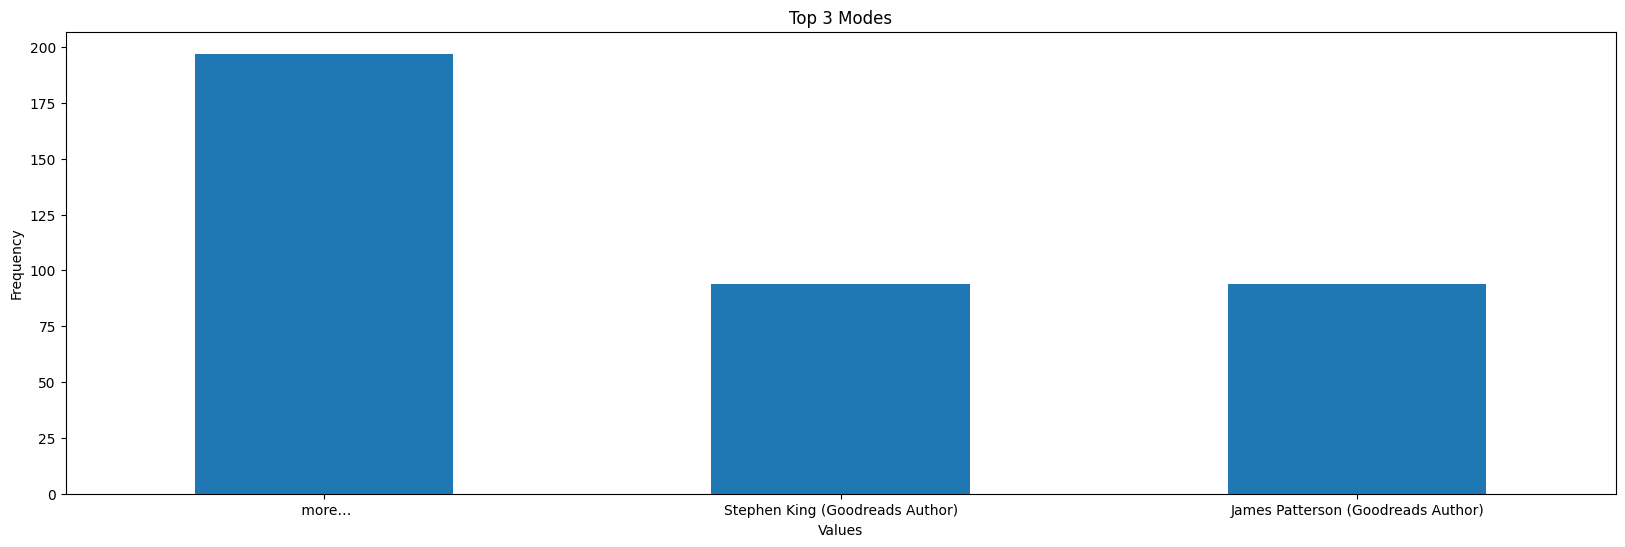

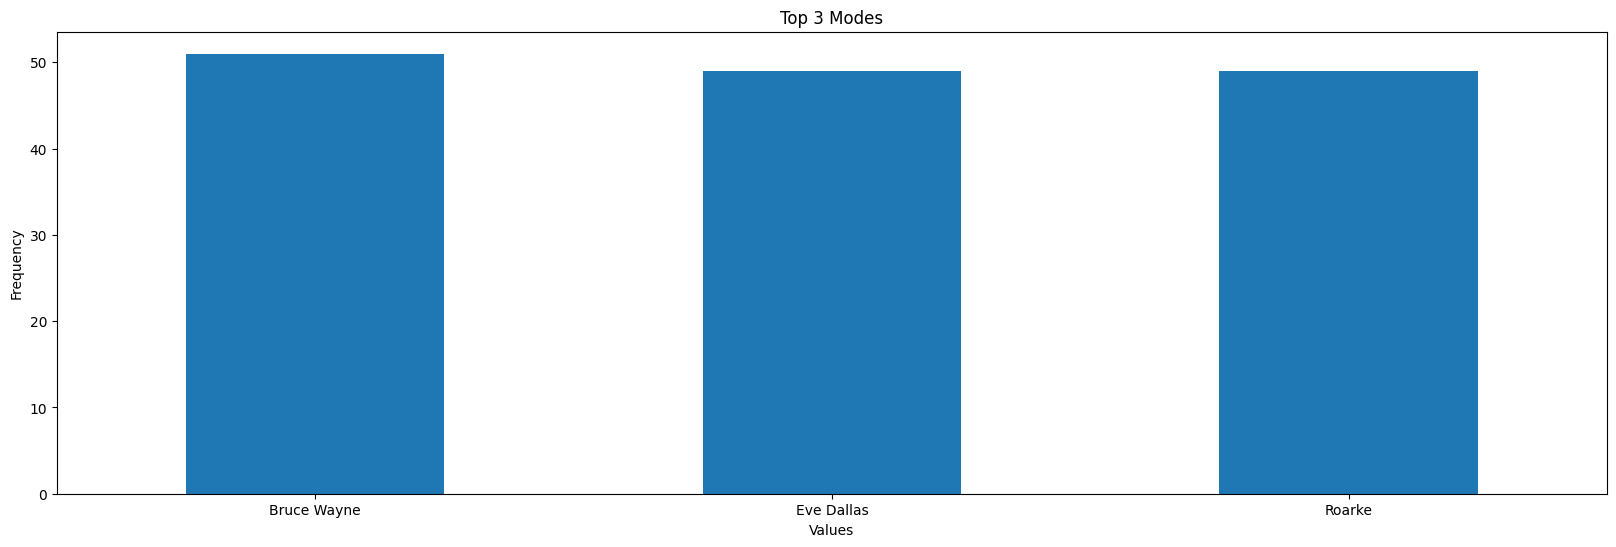

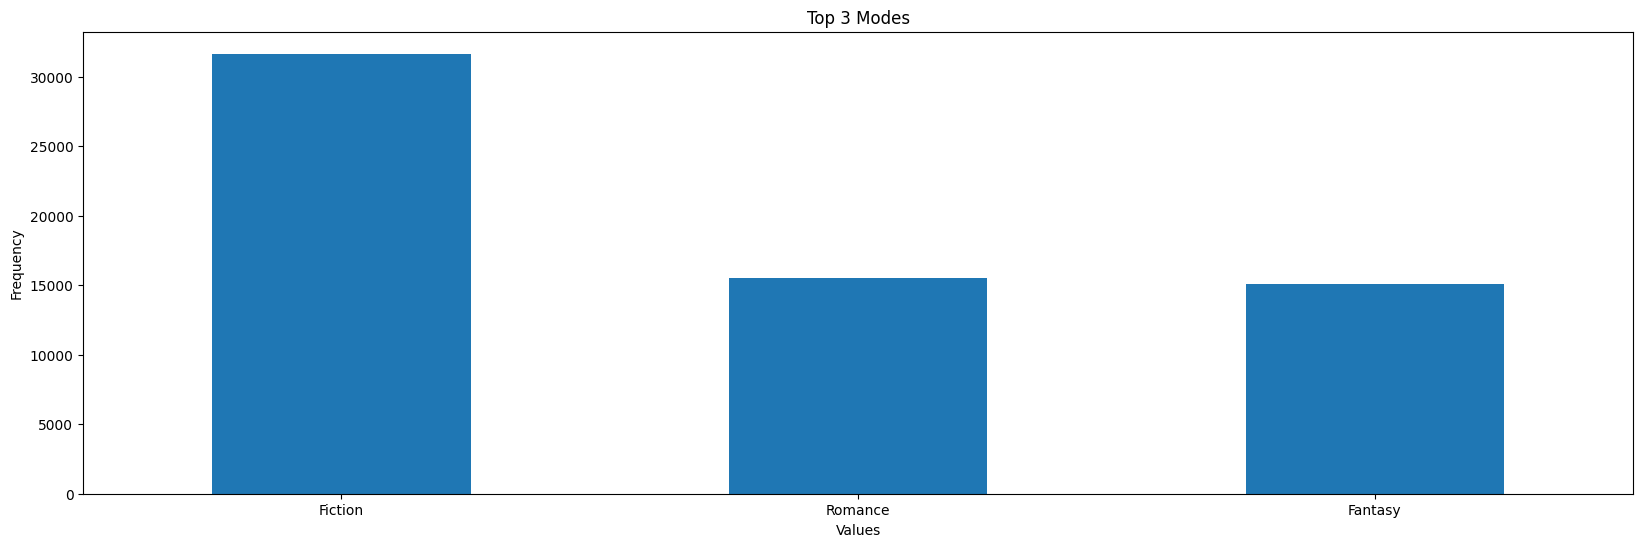

In [81]:
for mode_table in modes_tables:
    query = f"""
SELECT b.{mode_table[0]} FROM public.{mode_table[1]} a
INNER JOIN public.{mode_table[0]} b
ON a.{mode_table[2]} = b.index
"""
    df_mode = get_df_from_sql(query=query)
    plot_first_three_modes(df_mode,mode_table[0])

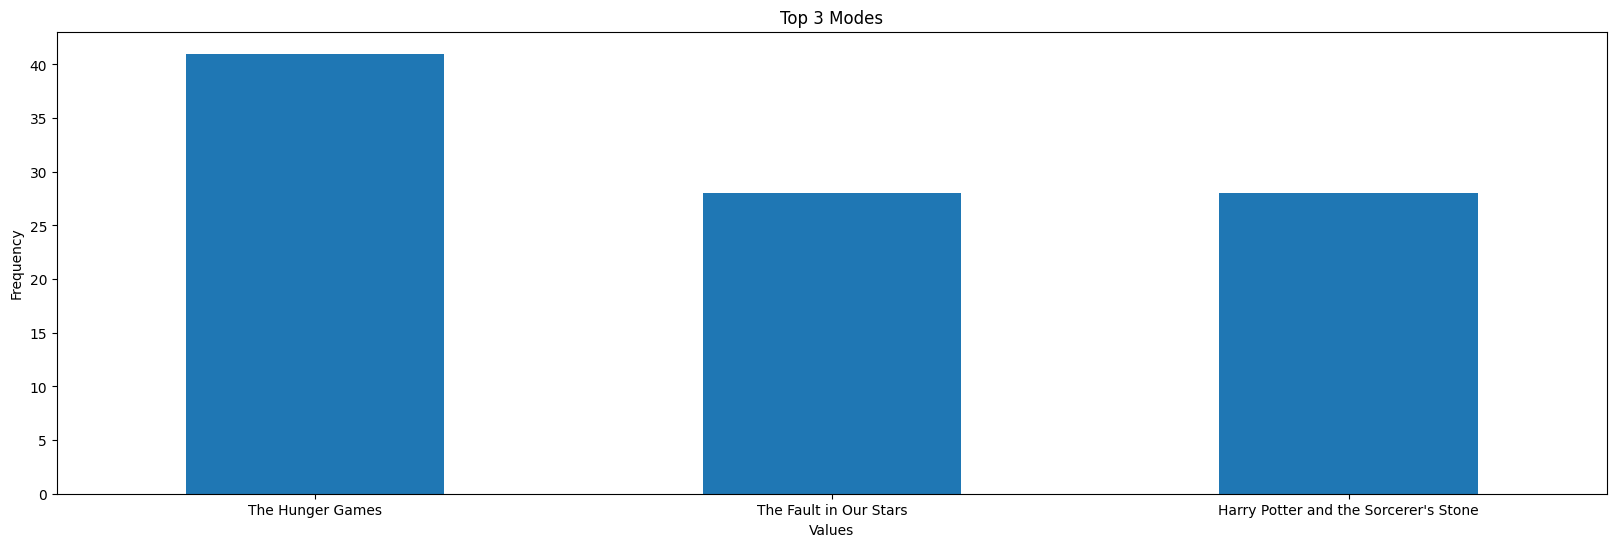

In [82]:
awards_query = """
SELECT b.title FROM public.books_awards a
INNER JOIN public.all_good_books_info b
ON a.books_id = b.index
"""
awards_df = get_df_from_sql(query=awards_query)
plot_first_three_modes(awards_df,'title')

In [83]:
df[['title','price']].iloc[df['price'].idxmax()]

title    The Oxford India Ghalib: Life, Letters and Ghazals
price                                               8715.51
Name: 37082, dtype: object

In [91]:
df[['title','price']].iloc[df['price'].idxmin()]

title    The State of Africa: A History of Fifty Years of Independence
price                                                             0.84
Name: 9283, dtype: object

In [89]:
ratings_query = """
SELECT title,rating FROM public.all_good_books_info
WHERE rating = 5.00
"""
ratings_df = get_df_from_sql(query=ratings_query)


In [90]:
ratings_df

,title,rating
0,A Knight in the Void,5.00
1,"Triangle of My Heart: A memoir of family, loss, and faith.",5.00
2,Se'chasingwa's Song,5.00
3,"Franks and Beans: Stories, Poems, and Tongue Twisters",5.00
4,Rosto Inacabado (Pequenos segredos alquímicos) (PT) (2013),5.00
...,...,...
848,The Mindful Vegetarian: A 28-Day Plan. The Essential Vegetarian Book for Health and Balance,5.00
849,Kristen In TJ's World,5.00
850,Retrain Your Mind: A Comprehensive Approach At Understanding and Overcoming Emotional Pain,5.00
851,"Furniture Of The New Zealand Colonial Era: An Illustrated History, 1830 1900",5.00


In [96]:
liked_percent_query = """
SELECT title,"likedPercent" FROM public.all_good_books_info
WHERE "likedPercent" = 100
"""

liked_percent_df = get_df_from_sql(query=liked_percent_query)

In [97]:
liked_percent_df

,title,likedPercent
0,Hooligan's Alley: Inspired by the Compelling True Story of a Hell's Kitchen Immigrant,100.00
1,A Knight in the Void,100.00
2,Het innerlijk behang en andere gedichten,100.00
3,For the Love of Armin,100.00
4,One Hundred Views of NW3,100.00
...,...,...
2446,La estética musical desde la Antigüedad hasta el siglo XX,100.00
2447,What Would You Do for Love If You Had No Fear?: Loving Without Losing--Your Mind,100.00
2448,Diana Princess of Wales,100.00
2449,Letters Home from The Crimea: A Young Cavalryman's Campaign,100.00
